# Brazil's Energy Generation

This notebook presents an exploration about the Brazil's energy generation in the years XXX and XXXX.

The data used in this analysis can be found at [Operador Nacional do Sistema Elétrico](http://www.ons.org.br/Paginas/resultados-da-operacao/historico-da-operacao/geracao_energia.aspx). The source doesn't presents an description for the features, so we'll try to understand it thinking about the context.

Through this analysis we'll try to answer the following questions:
- The energy generation increased during the pandemic?
- 




## Importing libraries and functions

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
path_parent = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))
os.chdir(path_parent)

In [3]:
os.getcwd()

'/home/tamiris/Documentos/Estudos/dsc_nanodegree/energy-generation-in-brazil'

In [4]:
import src.visualization.visualize as vis
import src.features.build_features as ft

%load_ext autoreload
%autoreload 2

## First impressions

In [5]:
df = pd.read_csv("data/raw/Geração_de_Energia_Subsistema_Full_Data_data.csv", low_memory=False)
df.head()

,id_subsistema,Modalidade de Operação,nom_tipousinasite,Período Verifica GE Cps 1,Val Geraenergiaconmwmed,Cod Aneel,Cod Aneel - Divisão 4,Cod Nucleoaneel,cod_modalidadeoperusiconj (tb usina),cod_nucleoaneel (tb_referenciacegusina (Conjunto)),...,cod_nucleoaneel (tb_referenciacegusina1 (PrevCarga)),Din Instante,Din Instante GE Cps 1,dsc_estado,Período Exibido GE,Qtd Din Instante GE Cps 1,Table Name,Selecione Tipo de GE Cps 1,Val Geraenergiacongwh,Zero
0,Sudeste/Centro-Oeste,Conjunto de Usinas,Térmica,True,169.841625,NaN,NaN,NaN,NaN,000009-J,...,NaN,9/30/2019 12:00:00 AM,9/30/2019 12:00:00 AM,GOIAS,4,9/30/2019 12:00:00 AM,gr_diconjuntousina,170,4.076199,0
1,Nordeste,Conjunto de Usinas,Eólica,True,0.000000,NaN,NaN,NaN,NaN,000023-J,...,NaN,10/1/2019 12:00:00 AM,10/1/2019 12:00:00 AM,PERNAMBUCO,4,10/1/2019 12:00:00 AM,gr_diconjuntousina,0,0.000000,0
2,Sul,Conjunto de Usinas,Hidrelétrica,True,24.200000,NaN,NaN,NaN,NaN,000036-J,...,NaN,10/1/2019 12:00:00 AM,10/1/2019 12:00:00 AM,RIO GRANDE DO SUL,4,10/1/2019 12:00:00 AM,gr_diconjuntousina,24,0.580800,0
3,Nordeste,Conjunto de Usinas,Eólica,True,27.420583,NaN,NaN,NaN,NaN,000015-J,...,NaN,10/1/2019 12:00:00 AM,10/1/2019 12:00:00 AM,BAHIA,4,10/1/2019 12:00:00 AM,gr_diconjuntousina,27,0.658094,0
4,Nordeste,Conjunto de Usinas,Eólica,True,37.047417,NaN,NaN,NaN,NaN,000028-J,...,NaN,10/1/2019 12:00:00 AM,10/1/2019 12:00:00 AM,RIO GRANDE DO NORTE,4,10/1/2019 12:00:00 AM,gr_diconjuntousina,37,0.889138,0


The dataset has a lot of columns with information that doesn't bring useful information, so first we can select a set of columns to start analyze. To decide which columns to choose, we can make an describe.

Above we can see NaN columns  like `Cod Aneel` and `Cod Aneel - Divisão 4`, so this columns will not be selected. There are also columns with only one unique value like `Período Verifica GE Cps 1` and `Zero`.

Interesting columns:
- `id_subsistema`: unique identifier of the subsystem of generation
- `Modalidade de Operação`: mode of operation
- `nom_tipousinasite`: name of types of power plants
- `Val Geraenergiaconmwmed`: value of energy generation average MW
- `Din Instante`: probably the moment of measure
- `dsc_estado`: name of the state
- `Val Geraenergiacongwh`: value of energy generation GWh 

In [6]:
df.describe(include='all')

,id_subsistema,Modalidade de Operação,nom_tipousinasite,Período Verifica GE Cps 1,Val Geraenergiaconmwmed,Cod Aneel,Cod Aneel - Divisão 4,Cod Nucleoaneel,cod_modalidadeoperusiconj (tb usina),cod_nucleoaneel (tb_referenciacegusina (Conjunto)),...,cod_nucleoaneel (tb_referenciacegusina1 (PrevCarga)),Din Instante,Din Instante GE Cps 1,dsc_estado,Período Exibido GE,Qtd Din Instante GE Cps 1,Table Name,Selecione Tipo de GE Cps 1,Val Geraenergiacongwh,Zero
count,2460642,2460642,2460642,2460642,2.460642e+06,0.0,0.0,0.0,0.0,276329,...,0.0,2460642,2460642,2460642,2460642.0,741428,2460642,741428,2.460642e+06,2460642.0
unique,4,7,5,1,NaN,NaN,NaN,NaN,NaN,176,...,NaN,8414,8414,27,NaN,1461,3,5215,NaN,NaN
top,Sudeste/Centro-Oeste,Tipo I,Hidrelétrica,True,NaN,NaN,NaN,NaN,NaN,000003-J,...,NaN,3/10/2021 12:00:00 AM,3/10/2021 12:00:00 AM,SAO PAULO,NaN,3/10/2021 12:00:00 AM,gr_diusina,0,NaN,NaN
freq,1214893,1554277,1260820,2460642,NaN,NaN,NaN,NaN,NaN,3445,...,NaN,587,587,349510,NaN,587,2024108,168880,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.809783e+02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4.343479e+00,0.0
std,NaN,NaN,NaN,NaN,5.246914e+02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.259259e+01,0.0
min,NaN,NaN,NaN,NaN,-2.957958e+01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,-7.099100e-01,0.0
25%,NaN,NaN,NaN,NaN,4.241986e+00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,1.018077e-01,0.0
50%,NaN,NaN,NaN,NaN,3.893292e+01,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,9.343900e-01,0.0
75%,NaN,NaN,NaN,NaN,1.303212e+02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,3.127708e+00,0.0


#### Selecting the columns:

This columns doesn't have friendly names, so we'll rename it too.

In [7]:
df = df[[
    'id_subsistema', 
    'Modalidade de Operação', 
    'nom_tipousinasite', 
    'Val Geraenergiaconmwmed', 
    'Din Instante', 
    'dsc_estado', 
    'Val Geraenergiacongwh'
    ]]
df.rename({'id_subsistema': 'subsystem', 
           'Modalidade de Operação': 'operation_type', 
           'nom_tipousinasite': 'power_plant_type', 
           'Val Geraenergiaconmwmed': 'generated_mw_med',
           'Din Instante': 'date',
           'dsc_estado': 'state',
           'Val Geraenergiacongwh': 'generated_gwh'
          }, axis=1, inplace=True)
df.head()

,subsystem,operation_type,power_plant_type,generated_mw_med,date,state,generated_gwh
0,Sudeste/Centro-Oeste,Conjunto de Usinas,Térmica,169.841625,9/30/2019 12:00:00 AM,GOIAS,4.076199
1,Nordeste,Conjunto de Usinas,Eólica,0.000000,10/1/2019 12:00:00 AM,PERNAMBUCO,0.000000
2,Sul,Conjunto de Usinas,Hidrelétrica,24.200000,10/1/2019 12:00:00 AM,RIO GRANDE DO SUL,0.580800
3,Nordeste,Conjunto de Usinas,Eólica,27.420583,10/1/2019 12:00:00 AM,BAHIA,0.658094
4,Nordeste,Conjunto de Usinas,Eólica,37.047417,10/1/2019 12:00:00 AM,RIO GRANDE DO NORTE,0.889138


Now we can focus in just some meaningful features. 

For the `describe` below, we can see all our data is complete, there is no NaN values. First impressions:
- `id_subsistema`: there are 4 distinct subsystems, the most frequent is `Sudeste/Centro-Oeste` and its frequency is almost 50% of the cases
- `Modalidade de Operação`: there are 7 types of operation modes, the most frequent is `Tipo I` and its represents more than 50% of the data
- `nom_tipousinasite`: there are 5 types of power plants, the most frequent is `Hidrelétrica` and its represents also more than 50% of the data
- `Val Geraenergiaconmwmed`: there are cases of negative generation, we'll verify if this is corrected in the context
- `Din Instante`: needs more exploration
- `dsc_estado`: there are 27 distinct states and the most frequent is São Paulo
- `Val Geraenergiacongwh`: there are also negative cases, we'll verify it

In [8]:
df.describe(include='all')

,subsystem,operation_type,power_plant_type,generated_mw_med,date,state,generated_gwh
count,2460642,2460642,2460642,2.460642e+06,2460642,2460642,2.460642e+06
unique,4,7,5,NaN,8414,27,NaN
top,Sudeste/Centro-Oeste,Tipo I,Hidrelétrica,NaN,3/10/2021 12:00:00 AM,SAO PAULO,NaN
freq,1214893,1554277,1260820,NaN,587,349510,NaN
mean,NaN,NaN,NaN,1.809783e+02,NaN,NaN,4.343479e+00
std,NaN,NaN,NaN,5.246914e+02,NaN,NaN,1.259259e+01
min,NaN,NaN,NaN,-2.957958e+01,NaN,NaN,-7.099100e-01
25%,NaN,NaN,NaN,4.241986e+00,NaN,NaN,1.018077e-01
50%,NaN,NaN,NaN,3.893292e+01,NaN,NaN,9.343900e-01
75%,NaN,NaN,NaN,1.303212e+02,NaN,NaN,3.127708e+00


Aparently the column `Din Instante` needs to be converted into datetime.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460642 entries, 0 to 2460641
Data columns (total 7 columns):
 #   Column            Dtype  
---  ------            -----  
 0   subsystem         object 
 1   operation_type    object 
 2   power_plant_type  object 
 3   generated_mw_med  float64
 4   date              object 
 5   state             object 
 6   generated_gwh     float64
dtypes: float64(2), object(5)
memory usage: 131.4+ MB


In [10]:
df['date'] = pd.to_datetime(df['date']).dt.date
df['date_month'] = pd.to_datetime(df['date']).dt.strftime('%Y-%m')
df['month'] = pd.to_datetime(df['date']).dt.strftime('%b')
df['week'] = pd.to_datetime(df['date']).dt.strftime('%U')

In [11]:
# sns.set_style('whitegrid', {'grid.color': '.6', 'grid.linestyle': ':'})
# sns.set_palette('pastel')

In [12]:
df_powerplant = df.groupby(by=['date_month', 'month', 'week', 'power_plant_type']).sum()

In [13]:
df_powerplant_1920 = df_powerplant.loc[(pd.to_datetime(df_powerplant.index.get_level_values('date_month')).year == 2019) | (pd.to_datetime(df_powerplant.index.get_level_values('date_month')).year == 2020)]

In [14]:
order = pd.to_datetime(df_powerplant_1920.index.get_level_values('date_month').unique()).sort_values().strftime('%Y-%m')

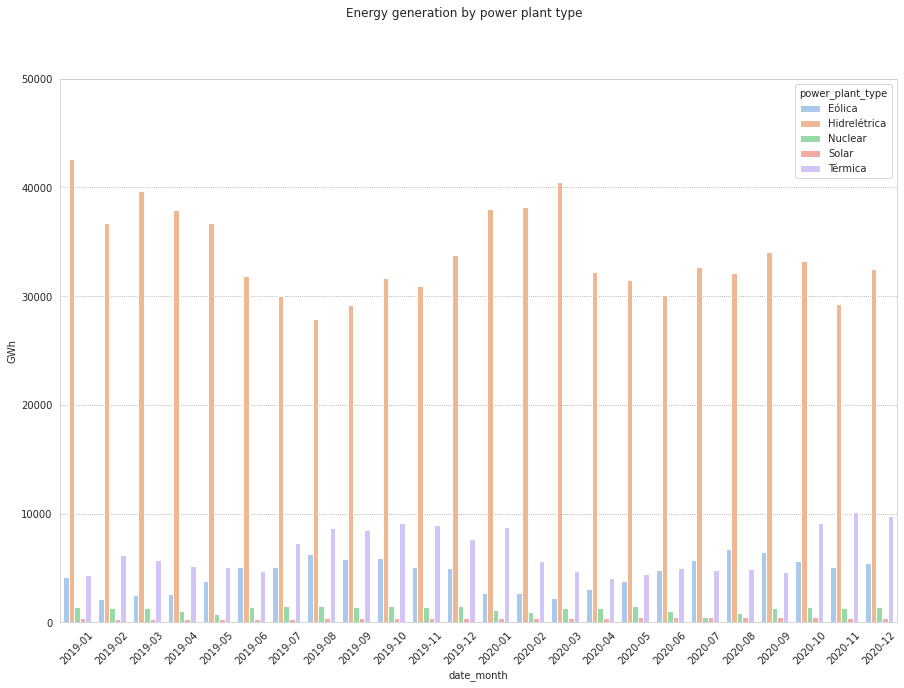

In [15]:
vis.barplot(df_powerplant_1920,
            x='date_month',
            y='generated_gwh',
            hue='power_plant_type',
            rotate=True,
            xlabel='Month',
            ylabel='GWh',
            ylim=(0, 50000),
            order=order,
            title='Energy generation by power plant type'
            )

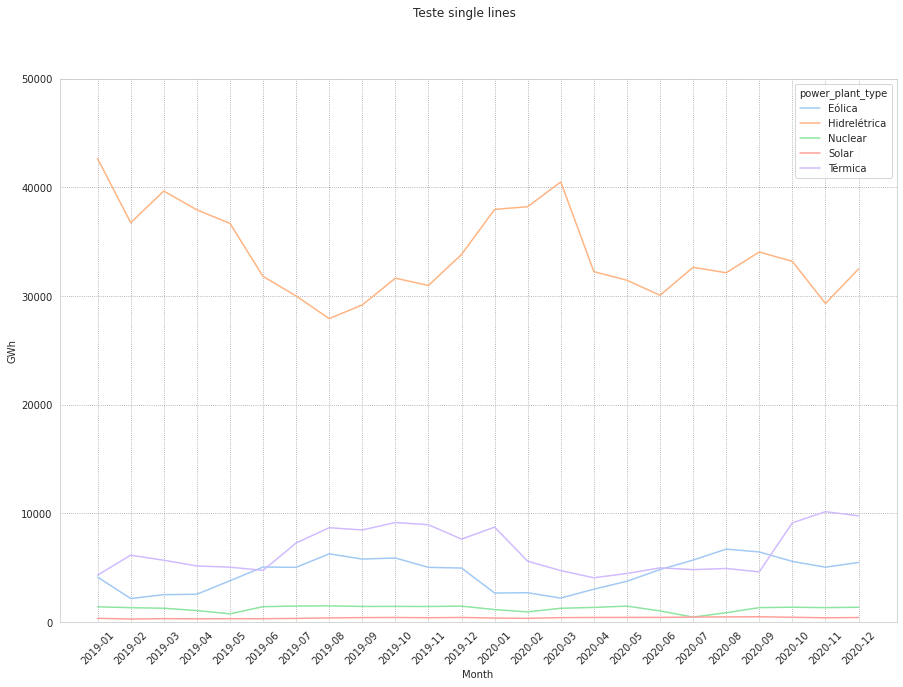

In [16]:
vis.lineplot(df_powerplant_1920,
             x='date_month',
             y='generated_gwh',
             hue='power_plant_type',
             xlabel='Month',
             ylabel='GWh',
             ylim=(0, 50000),
             title='Teste single lines',
             rotate=True
            )

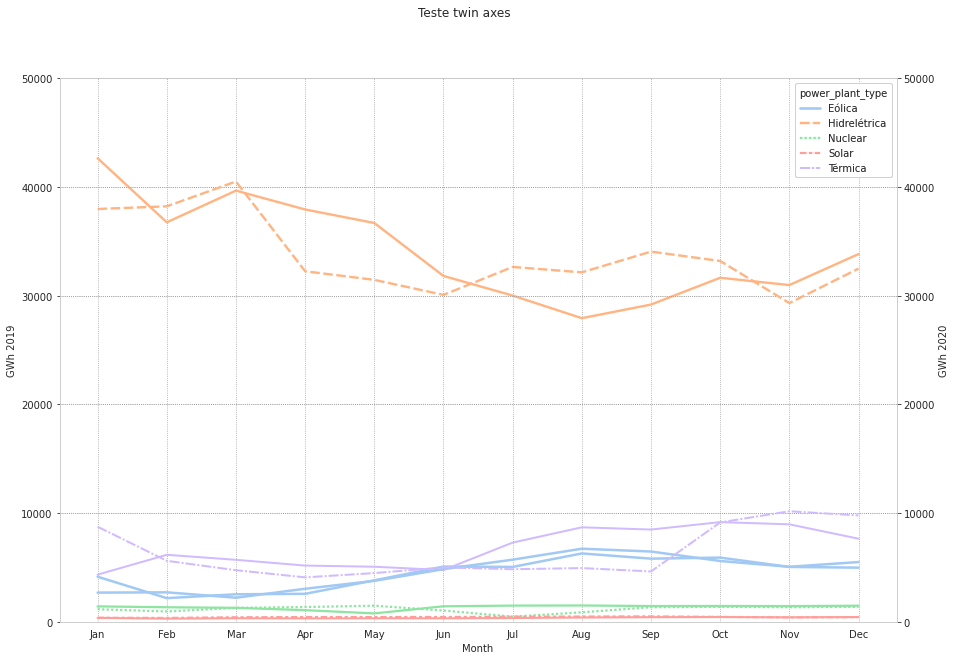

In [17]:
vis.lineplot(df_powerplant_1920.loc[pd.to_datetime(df_powerplant_1920.index.get_level_values('date_month')).year == 2019],
             df_twin=df_powerplant_1920.loc[pd.to_datetime(df_powerplant_1920.index.get_level_values('date_month')).year == 2020],
             x='month',
             y='generated_gwh',
             hue='power_plant_type',
             size='power_plant_type',
             style='power_plant_type',
             twinx=True,
             xlabel='Month',
             ylabel='GWh 2019',
             ylabeltwin='GWh 2020',
             ylim=(0, 50000),
             title='Teste twin axes'
            )

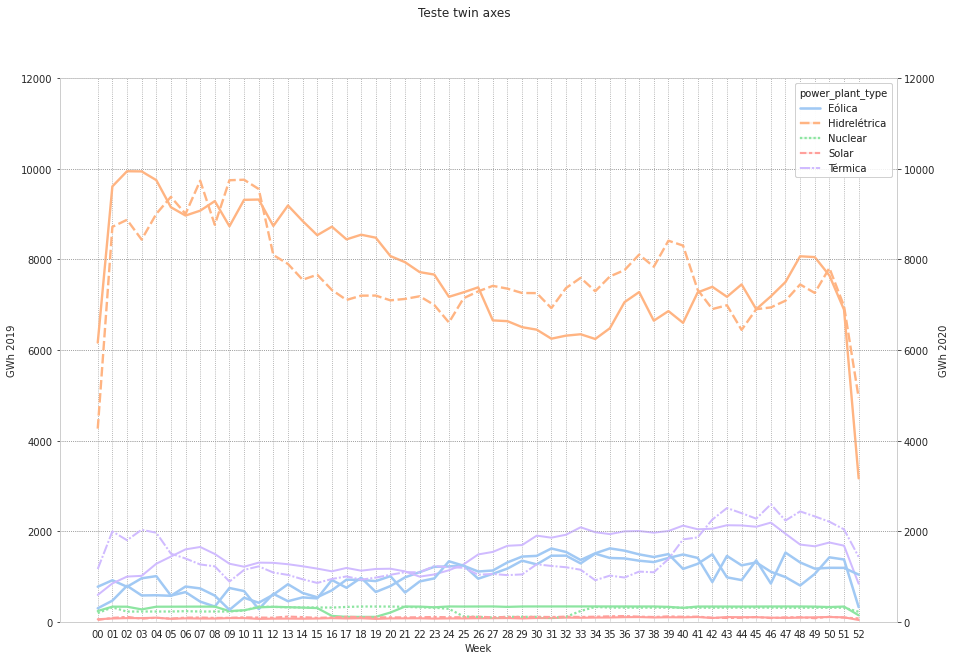

In [18]:
vis.lineplot(df_powerplant_1920.loc[pd.to_datetime(df_powerplant_1920.index.get_level_values('date_month')).year == 2019],
             df_twin=df_powerplant_1920.loc[pd.to_datetime(df_powerplant_1920.index.get_level_values('date_month')).year == 2020],
             x='week',
             y='generated_gwh',
             hue='power_plant_type',
             size='power_plant_type',
             style='power_plant_type',
             twinx=True,
             xlabel='Week',
             ylabel='GWh 2019',
             ylabeltwin='GWh 2020',
             ylim=(0, 12000),
             title='Teste twin axes'
            )